# Clinical Data Embeddings

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

In [2]:
# Loading the dataset
df = pd.read_csv("clinical_Data.csv")

In [3]:
print("Dataset Overview:\n")
print("Shape of DataFrame:", df.shape)  # Number of rows and columns

Dataset Overview:

Shape of DataFrame: (105, 57)


In [4]:
print("\nColumn Names:\n", df.columns.tolist())  # Column names


Column Names:
 ['TCIA_ID', 'Interval_BL', 'Interval_FU', 'TTP', 'Death_1_StillAliveorLostToFU_0', 'Censored_0_progressed_1', 'OS', 'hepatitis', 'age', 'agegp', 'Sex', 'Smoking', 'Alcohol', 'fhx_can', 'fhx_livc', 'Diabetes', 'Personal history of cancer', 'Evidence_of_cirh', 'Pathology', 'PS_bclc_0_0_1-2_1_3-4_3', 'CPS', 'Tr_Size', 'tumor_nodul', 'Vascular invasion', 'Metastasis', 'Lymphnodes', 'Portal Vein Thrombosis', 'T_involvment', 'AFP', 'AFP_group', 'CLIP_Score', 'CLIP', 'Okuda', 'TNM', 'BCLC', 'chemotherapy', '1_EASL_BL', '1_EASL_FU', '1_EASL', '1_RECIST_BL', '1_RECIST_FU', '1_RECIST', '2_RECIST_BL', '2_RECIST_FU', '2_RECIST', '3_RECIST_BL', '3_RECIST_FU', '3_RECIST', '1_mRECIST_BL', '1_mRECIST_FU', '1_mRECIST', '2_mRECIST_BL', '2_mRECIST_FU', '2_mRECIST', '3_mRECIST_BL', '3_mRECIST_FU', '3_mRECIST']


In [5]:
print("\nData Types:\n", df.dtypes)  # Data types of each column


Data Types:
 TCIA_ID                            object
Interval_BL                         int64
Interval_FU                       float64
TTP                               float64
Death_1_StillAliveorLostToFU_0      int64
Censored_0_progressed_1             int64
OS                                float64
hepatitis                          object
age                                 int64
agegp                              object
Sex                                 int64
Smoking                             int64
Alcohol                             int64
fhx_can                             int64
fhx_livc                            int64
Diabetes                            int64
Personal history of cancer          int64
Evidence_of_cirh                    int64
Pathology                          object
PS_bclc_0_0_1-2_1_3-4_3             int64
CPS                                object
Tr_Size                           float64
tumor_nodul                        object
Vascular invasion   

In [6]:
print("\nFirst 5 Rows:\n")  # First 5 rows
df.head()


First 5 Rows:



,TCIA_ID,Interval_BL,Interval_FU,TTP,Death_1_StillAliveorLostToFU_0,Censored_0_progressed_1,OS,hepatitis,age,agegp,...,3_RECIST,1_mRECIST_BL,1_mRECIST_FU,1_mRECIST,2_mRECIST_BL,2_mRECIST_FU,2_mRECIST,3_mRECIST_BL,3_mRECIST_FU,3_mRECIST
0,HCC_001,-18,20.43,197.000000,1,1,350.285714,HCV only,71,>70,...,3.0,44.5,0.0,1.0,43.0,0.0,1.0,43.0,0.0,1.0
1,HCC_002,84,22.86,20.714286,1,0,25.285714,HBV only,72,>70,...,3.0,103.7,58.6,2.0,107.0,69.0,2.0,106.0,58.6,2.0
2,HCC_003,3,7.00,5.571429,1,1,21.428571,HCV only,53,51-60,...,3.0,162.2,173.9,3.0,87.0,127.0,4.0,127.0,138.0,3.0
3,HCC_004,1,7.57,5.428571,1,0,10.285714,No virus,80,>70,...,3.0,70.8,70.8,3.0,65.0,44.0,2.0,65.0,50.9,3.0
4,HCC_005,435,13.86,12.857143,1,0,56.285714,No virus,73,>70,...,3.0,70.2,62.1,3.0,67.0,62.0,3.0,63.3,68.2,3.0


In [7]:
# Summary Statistics
print("\nStatistical Summary:\n")  # Summary stats
df.describe(include='all')



Statistical Summary:



,TCIA_ID,Interval_BL,Interval_FU,TTP,Death_1_StillAliveorLostToFU_0,Censored_0_progressed_1,OS,hepatitis,age,agegp,...,3_RECIST,1_mRECIST_BL,1_mRECIST_FU,1_mRECIST,2_mRECIST_BL,2_mRECIST_FU,2_mRECIST,3_mRECIST_BL,3_mRECIST_FU,3_mRECIST
count,105,105.000000,97.000000,105.000000,105.000000,105.000000,105.000000,105,105.000000,105,...,95.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,95.000000
unique,105,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,HCC_105,NaN,NaN,NaN,NaN,NaN,NaN,No virus,NaN,>70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,54,NaN,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,22.285714,9.697938,32.989143,0.885714,0.428571,126.613605,NaN,67.542857,NaN,...,2.968421,71.487500,46.344792,2.208333,74.239583,43.187500,2.072917,67.190526,43.315789,2.273684
std,NaN,106.165665,6.270395,36.963093,0.319684,0.497245,103.267016,NaN,11.283095,NaN,...,0.448464,43.284093,44.160966,0.857373,47.106541,45.225124,0.836594,40.981480,41.874951,0.764117
min,NaN,-303.000000,-25.860000,4.000000,0.000000,0.000000,6.857143,NaN,31.000000,NaN,...,2.000000,15.600000,0.000000,1.000000,15.000000,0.000000,1.000000,16.700000,0.000000,1.000000
25%,NaN,0.000000,7.000000,9.714286,1.000000,0.000000,56.285714,NaN,59.000000,NaN,...,3.000000,38.175000,10.525000,2.000000,41.000000,0.000000,1.000000,38.700000,14.000000,2.000000
50%,NaN,6.000000,9.000000,20.714286,1.000000,0.000000,104.428571,NaN,69.000000,NaN,...,3.000000,64.400000,39.650000,2.000000,64.500000,30.500000,2.000000,54.900000,31.400000,2.000000
75%,NaN,28.000000,11.860000,40.857143,1.000000,1.000000,148.142857,NaN,76.000000,NaN,...,3.000000,90.400000,66.750000,3.000000,89.250000,62.500000,3.000000,82.800000,57.900000,3.000000


In [8]:
# Missing Values Check
print("\nMissing Values Count:\n")  # Count of missing values per column
df.isna().sum()



Missing Values Count:



TCIA_ID                            0
Interval_BL                        0
Interval_FU                        8
TTP                                0
Death_1_StillAliveorLostToFU_0     0
Censored_0_progressed_1            0
OS                                 0
hepatitis                          0
age                                0
agegp                              0
Sex                                0
Smoking                            0
Alcohol                            0
fhx_can                            0
fhx_livc                           0
Diabetes                           0
Personal history of cancer         0
Evidence_of_cirh                   0
Pathology                          0
PS_bclc_0_0_1-2_1_3-4_3            0
CPS                                0
Tr_Size                           52
tumor_nodul                        0
Vascular invasion                  0
Metastasis                         0
Lymphnodes                         0
Portal Vein Thrombosis             0
T

In [9]:
print("\nTotal Missing Values:")  # Total missing values
df.isna().sum().sum()


Total Missing Values:


272

In [10]:
# Check for Duplicates
print("\nDuplicate Rows Count:")  # Count of duplicate rows
df.duplicated().sum()


Duplicate Rows Count:


0

In [11]:
# Unique Values per Column
print("\nUnique Values Count:\n")  # Unique values per column
df.nunique()


Unique Values Count:



TCIA_ID                           105
Interval_BL                        54
Interval_FU                        61
TTP                                94
Death_1_StillAliveorLostToFU_0      2
Censored_0_progressed_1             2
OS                                102
hepatitis                           4
age                                40
agegp                               5
Sex                                 2
Smoking                             2
Alcohol                             2
fhx_can                             2
fhx_livc                            2
Diabetes                            2
Personal history of cancer          2
Evidence_of_cirh                    2
Pathology                           7
PS_bclc_0_0_1-2_1_3-4_3             3
CPS                                 3
Tr_Size                            41
tumor_nodul                         2
Vascular invasion                   2
Metastasis                          2
Lymphnodes                          2
Portal Vein 

In [12]:
# Defining the target variable [Censored_0_progressed_1 → 1: Indicates liver cancer and 0: Indicates no progression or absence of liver cancer]
target_column = "Censored_0_progressed_1"
y = df[target_column]
df = df.drop(columns=[target_column])  # Removing target from features

In [13]:
# Encoding categorical variables
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Handling missing values (fill with mean)
df.fillna(df.mean(), inplace=True)

# Normalizing the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

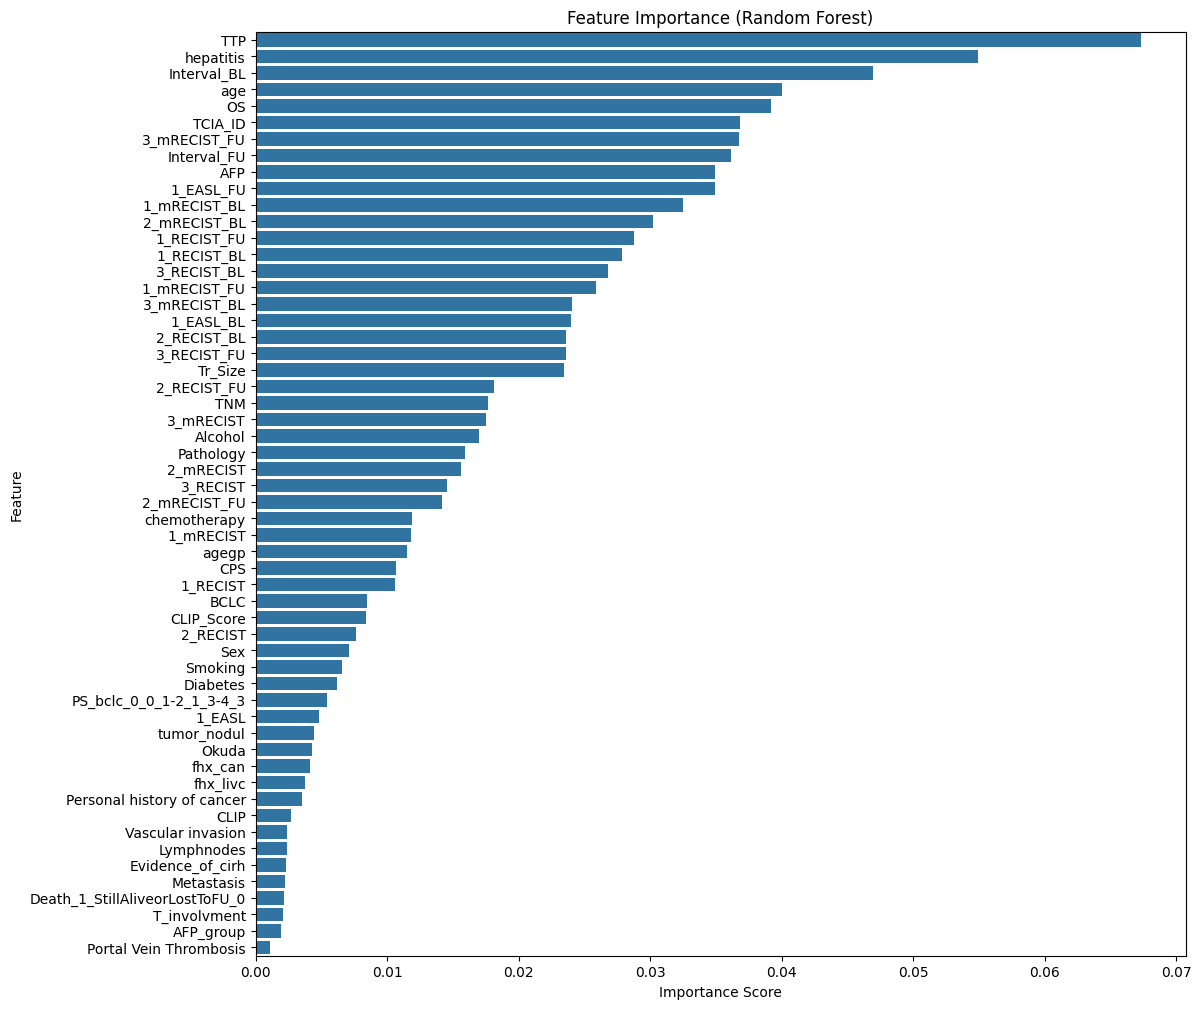

Features to be dropped due to low importance: ['1_EASL', 'tumor_nodul', 'Okuda', 'fhx_can', 'fhx_livc', 'Personal history of cancer', 'CLIP', 'Vascular invasion', 'Lymphnodes', 'Evidence_of_cirh', 'Metastasis', 'Death_1_StillAliveorLostToFU_0', 'T_involvment', 'AFP_group', 'Portal Vein Thrombosis']


In [14]:
#Computing Feature Importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(df_scaled, y)

# feature importances
feature_importance = pd.Series(rf.feature_importances_, index=df_scaled.columns).sort_values(ascending=False)

# Plotting Feature Importance
plt.figure(figsize=(12, 12))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

#  Checking the features having low importance (less than 0.005) in contributing to the target variable
low_importance_threshold = 0.005
low_importance_features = feature_importance[feature_importance < low_importance_threshold].index.tolist()

print("Features to be dropped due to low importance:", low_importance_features)


In [15]:
# Dropping features that have very low importance
df_selected = df_scaled.drop(columns=low_importance_features)

# Recursive Feature Elimination (RFE)
rfe = RFECV(estimator=rf, step=1, cv=5, scoring='accuracy')
rfe.fit(df_selected, y)


RFECV(cv=5, estimator=RandomForestClassifier(random_state=42),
      scoring='accuracy')

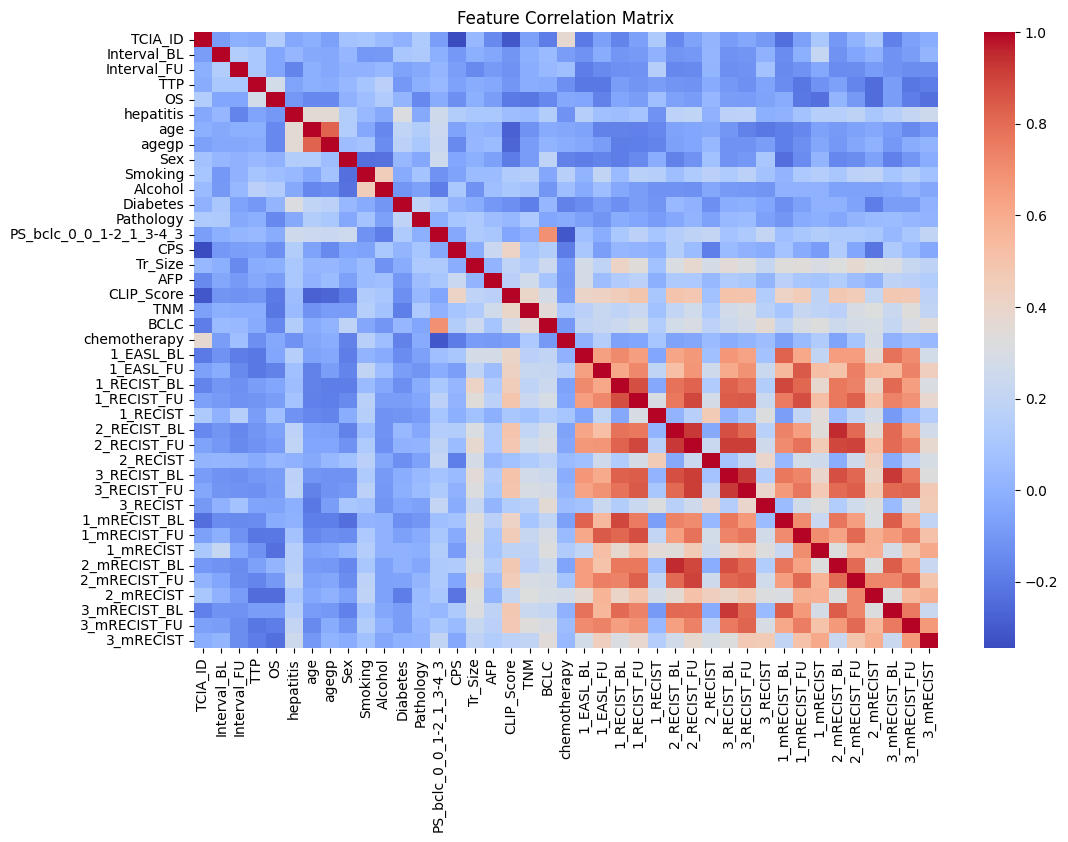

{'2_RECIST_BL', '2_RECIST_FU', '3_RECIST_BL'}

In [16]:
# Computing correlation matrix
corr_matrix = df_selected.corr()

# Setting threshold for high correlation
threshold = 0.9

# Finding highly correlated features
high_corr_pairs = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.add((corr_matrix.columns[i], corr_matrix.columns[j]))

# Extracting features to drop (keeping one from each correlated pair)
features_to_drop = set([pair[1] for pair in high_corr_pairs])

# Dropping highly correlated features
df_final_reduced = df_selected.drop(columns=features_to_drop)

#correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

#list of dropped features
features_to_drop


In [17]:
df_selected_normalized = scaler.fit_transform(df_final_reduced)
# Converting to PyTorch tensor
patient_data = torch.tensor(df_selected_normalized, dtype=torch.float32)    # Shape: (105, num_features)
target_labels = torch.tensor(y.values, dtype=torch.long)                    # Shape: (105,) for classification

In [18]:
# Normalize the selected features
scaler = StandardScaler()
df_selected_normalized = scaler.fit_transform(df_selected_normalized)

# Convert data to PyTorch tensors
patient_data = torch.tensor(df_selected_normalized, dtype=torch.float32)    # Shape: (105, num_features)
target_labels = torch.tensor(y.values, dtype=torch.long)                    # Shape: (105,)

# Train-test split (80% train, 20% test)
train_data, test_data, train_labels, test_labels = train_test_split(
    patient_data, target_labels, test_size=0.2, random_state=42, stratify=target_labels
)

# PVEM Model
class PVEMClassifier(nn.Module):
    def __init__(self, input_dim, embedding_dim=128, num_classes=2):
        super(PVEMClassifier, self).__init__()
        self.weight = nn.Parameter(torch.randn(input_dim, embedding_dim))  # Learnable feature embeddings
        self.bias = nn.Parameter(torch.randn(input_dim, embedding_dim))  # Feature-wise bias
        self.dropout = nn.Dropout(p=0.3)  # Dropout for regularization
        self.classifier = nn.Linear(input_dim * embedding_dim, num_classes)  # Classifier

    def forward(self, x):
        embeddings = x.unsqueeze(-1) * self.weight + self.bias  # (batch_size, num_features, 128)
        flattened_embeddings = embeddings.reshape(x.shape[0], -1)  # (batch_size, num_features * 128)
        flattened_embeddings = self.dropout(flattened_embeddings)  # Apply dropout
        logits = self.classifier(flattened_embeddings)  # (batch_size, 2)
        return embeddings, logits

# Initialize model
num_features = train_data.shape[1]
embedding_dim = 128
model = PVEMClassifier(num_features, embedding_dim, num_classes=2)

# Define loss function & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train model
num_epochs = 500
for epoch in range(num_epochs):
    optimizer.zero_grad()
    embeddings, logits = model(train_data)
    loss = criterion(logits, train_labels)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

# Evaluate on Test Data
with torch.no_grad():
    test_embeddings, test_logits = model(test_data)
    test_loss = criterion(test_logits, test_labels)
    predictions = torch.argmax(test_logits, dim=1)
    accuracy = (predictions == test_labels).float().mean().item()

print(f"Test Loss: {test_loss.item():.6f}, Test Accuracy: {accuracy * 100:.2f}%")

# Generate embeddings for train and test data
with torch.no_grad():
    full_embeddings_np, _ = model(patient_data)
    train_embeddings, _ = model(train_data)
    test_embeddings, _ = model(test_data)

# Convert and save embeddings
np.save("clinical_train_embeddings.npy", train_embeddings.detach().cpu().numpy())
np.save("clinical_test_embeddings.npy", test_embeddings.detach().cpu().numpy())

print("Clinical TRAIN embeddings saved successfully! Shape:", train_embeddings.shape)
print("Clinical TEST embeddings saved successfully! Shape:", test_embeddings.shape)

# Save train and test labels to csv files
train_labels_df = pd.DataFrame({'ID': train_data['TCIA_ID'], 'label': train_labels.numpy()})
test_labels_df = pd.DataFrame({'ID': test_data['TCIA_ID'], 'label': test_labels.numpy()})
train_labels_df.to_csv("train_labels.csv", index=False)
test_labels_df.to_csv("test_labels.csv", index=False)


Epoch 0, Loss: 0.916443
Epoch 50, Loss: 0.375545
Epoch 100, Loss: 0.347607
Epoch 150, Loss: 0.339344
Epoch 200, Loss: 0.319974
Epoch 250, Loss: 0.325107
Epoch 300, Loss: 0.317159
Epoch 350, Loss: 0.325729
Epoch 400, Loss: 0.360450
Epoch 450, Loss: 0.322697
Test Loss: 0.476608, Test Accuracy: 80.95%
Clinical TRAIN embeddings saved successfully! Shape: torch.Size([84, 38, 128])
Clinical TEST embeddings saved successfully! Shape: torch.Size([21, 38, 128])


In [19]:
print("Embeddings Generated Successfully!")
print("Final Shape of All Patients:", full_embeddings_np.shape)  # Expected: (105, num_features, 128)

Embeddings Generated Successfully!
Final Shape of All Patients: torch.Size([105, 38, 128])


In [20]:
full_embeddings_np.mean()

tensor(0.0040)

In [21]:
full_embeddings_np.std()

tensor(1.4024)

In [22]:
full_embeddings_np.shape

torch.Size([105, 38, 128])

In [23]:
print("Embedding of first patient (first feature):\n", full_embeddings_np[0, 0])  # Shape: (128,)
print("Embedding of first patient (second feature):\n", full_embeddings_np[0, 1])  # Shape: (128,)


Embedding of first patient (first feature):
 tensor([ 2.5339, -1.1943, -3.0317, -0.1857,  0.7794, -1.1966, -0.8936, -2.2588,
        -2.1807,  0.6264, -1.1158,  2.2609,  2.3447,  2.7932,  1.3910,  1.3174,
         1.4401,  1.1518,  1.1406, -1.8469,  1.3072,  3.4575,  0.0204, -0.0471,
        -0.4525,  1.9716,  2.3056,  3.4394,  1.0607, -2.3766, -1.4947, -1.6506,
         1.5998, -1.1722,  0.6912, -4.4674,  2.1061,  2.2951, -1.8682,  6.5850,
        -1.8695,  0.3258,  0.2956,  0.2861,  1.1242, -0.6770,  1.7932, -1.6843,
         0.4271, -2.7413,  4.3957,  0.5110,  3.4195, -1.2712,  0.3110, -1.3676,
        -0.1326,  5.0678,  1.2998,  2.3820,  2.9820,  0.3894, -0.1892,  1.6141,
         2.0016, -0.9453, -0.9010,  1.4177,  0.5072,  0.1477, -1.2624,  0.3606,
        -0.1412,  0.7458, -0.3096,  0.0862, -0.1216,  0.8382,  1.3191, -0.7499,
        -1.1174, -0.1809, -0.2753, -0.6643, -0.7912,  0.1958, -0.1665, -0.5735,
        -2.5036, -0.0755,  1.4603,  1.1463, -2.0801, -1.8816, -2.9337,  2.5

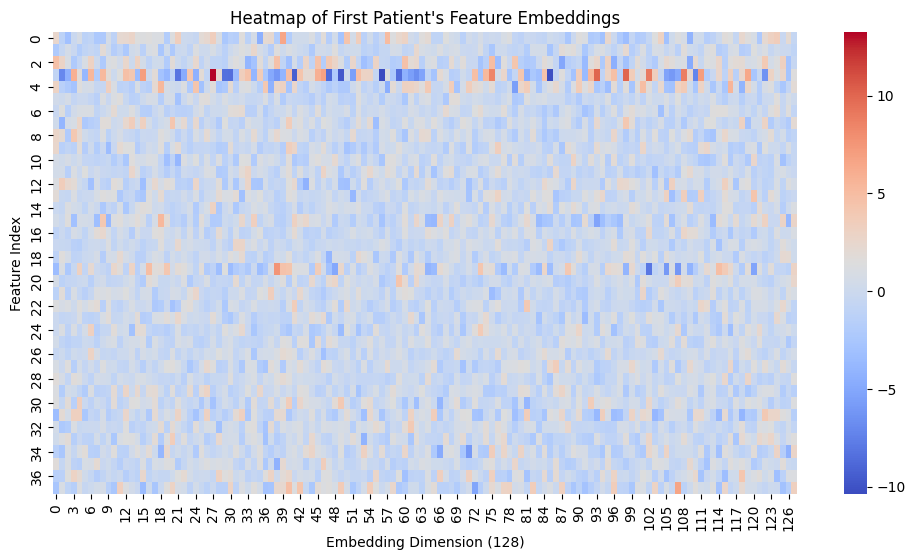

In [24]:
plt.figure(figsize=(12, 6))
sns.heatmap(full_embeddings_np[0], cmap="coolwarm", annot=False)
plt.title("Heatmap of First Patient's Feature Embeddings")
plt.xlabel("Embedding Dimension (128)")
plt.ylabel("Feature Index")
plt.show()


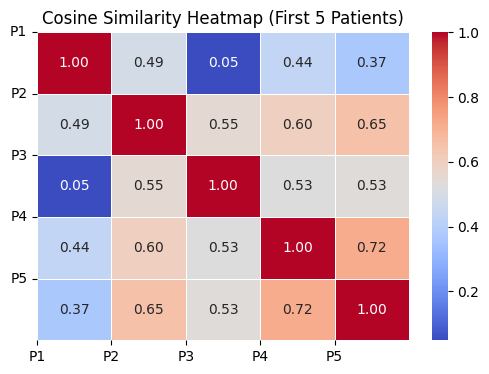

In [25]:
# Flatten embeddings to (105, num_features * 128)
flat_embeddings = full_embeddings_np.reshape(105, -1)

# Compute similarity matrix
similarity_matrix = cosine_similarity(flat_embeddings)

# Extract only the first 5 patients' similarities
similarity_subset = similarity_matrix[:5, :5]

# Plot heatmap
plt.figure(figsize=(6, 4))  # Adjust size
ax = sns.heatmap(similarity_subset, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

# Labels
plt.title("Cosine Similarity Heatmap (First 5 Patients)", fontsize=12)
plt.xticks(ticks=range(5), labels=[f"P{i+1}" for i in range(5)], fontsize=10)
plt.yticks(ticks=range(5), labels=[f"P{i+1}" for i in range(5)], fontsize=10, rotation=0)

plt.show()


In [26]:
# Saving embeddings as NumPy file
np.save("patient_feature_embeddings.npy", full_embeddings_np)

In [27]:
reshaped_data = full_embeddings_np.reshape(-1, 128)

# Creating a multi-index for (105, 38) patients & features
index = pd.MultiIndex.from_product([range(105), range(38)], names=["Patient", "Feature"])
df = pd.DataFrame(reshaped_data, index=index)

# Saving as CSV
df.to_csv("output_multiindex.csv")

print("CSV saved with shape:", df.shape)

CSV saved with shape: (3990, 128)
